In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("../Data/Processed/cleaned_csv.csv")
df.head(3)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M


In [3]:
df.work_year.value_counts()

work_year
2025    36229
2024    27780
2023     4643
2022     1208
2021      261
2020       87
Name: count, dtype: int64

In [4]:
#top 5 job titles

In [5]:
top_jobs = df.job_title.value_counts().head(5).reset_index()
top_jobs.columns = ['job_title', 'count']
type(top_jobs)

pandas.core.frame.DataFrame

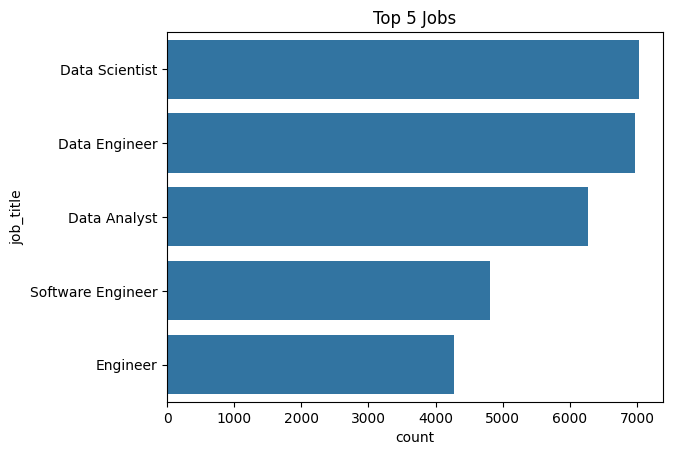

In [6]:
sns.barplot(data=top_jobs, x = 'count', y = 'job_title')
plt.title("Top 5 Jobs")
plt.show()

In [7]:
#employement type vs average salary

In [8]:
emptype_salary = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
emptype_salary.columns = ['type','Avg_salary']
emptype_salary

,type,Avg_salary
0,FT,151715.733111
1,CT,103030.021505
2,PT,78973.703704
3,FL,46856.944444


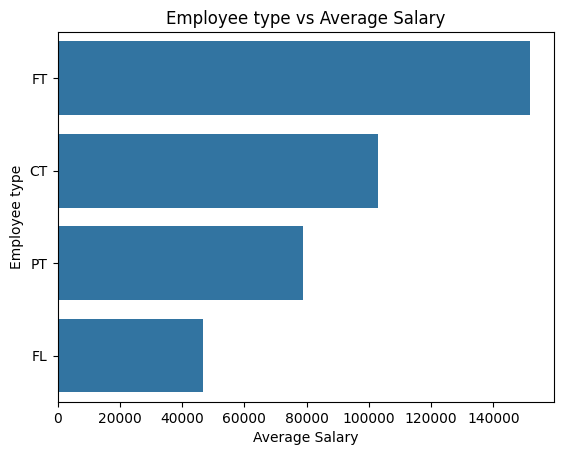

In [9]:
sns.barplot(data=emptype_salary, x = 'Avg_salary' , y = 'type')
plt.title("Employee type vs Average Salary")
plt.ylabel("Employee type")
plt.xlabel("Average Salary")
plt.show()

In [10]:
#exp vs avg salary 

In [11]:
exp_vs_salary = df.groupby('experience_level')['salary_in_usd'].mean().sort_values().reset_index()

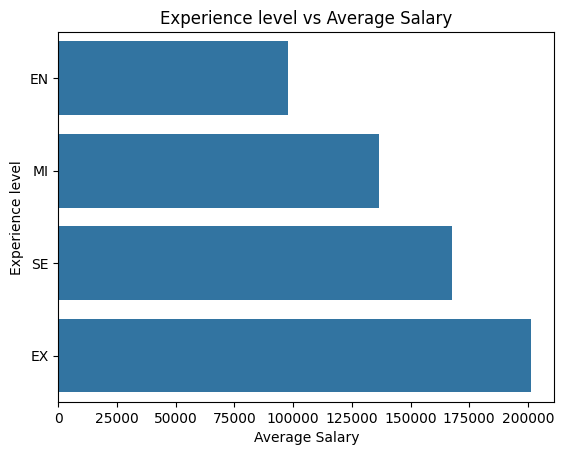

In [12]:
sns.barplot(data=exp_vs_salary, x = 'salary_in_usd', y = 'experience_level')
plt.title("Experience level vs Average Salary")
plt.xlabel("Average Salary")
plt.ylabel("Experience level")
plt.show()

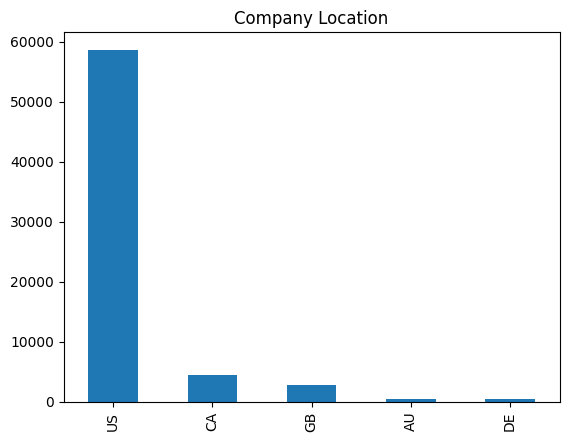

In [13]:
df.company_location.value_counts().head(5).plot(kind = 'bar')
plt.title("Company Location")
plt.xlabel("")
plt.show()

In [14]:
#avg salary vs company size 

<Axes: xlabel='company_size'>

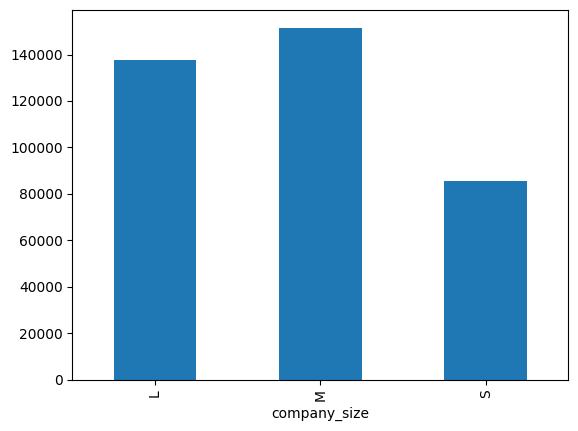

In [15]:
df.groupby("company_size")['salary_in_usd'].mean().plot(kind='bar')

In [16]:
grouped_df= df.groupby(["job_title","work_year"])['salary_in_usd'].median().reset_index().head(80)
grouped_df

,job_title,work_year,salary_in_usd
0,3D Computer Vision Researcher,2021,5409.0
1,AI Architect,2022,180000.0
2,AI Architect,2023,209968.0
3,AI Architect,2024,191850.0
4,AI Architect,2025,188300.0
...,...,...,...
75,Analyst,2025,105820.0
76,Analytics Analyst,2024,24000.0
77,Analytics Engineer,2022,135000.0
78,Analytics Engineer,2023,150000.0


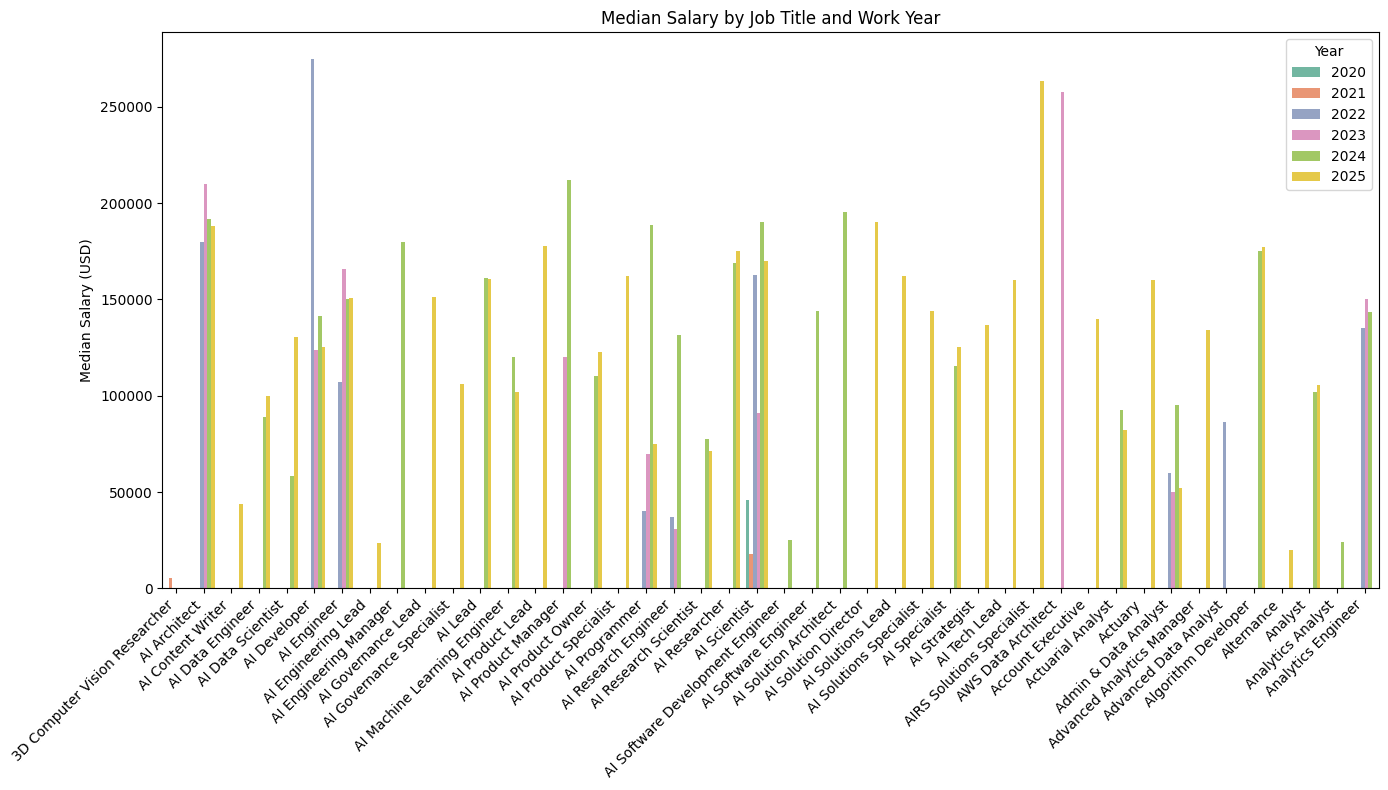

In [21]:
plt.figure(figsize=(14, 8))

sns.barplot(
    data=grouped_df,
    x="job_title",
    y="salary_in_usd",
    hue="work_year",
    palette="Set2"
)

plt.xticks(rotation=45, ha='right') 
plt.xlabel("")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary by Job Title and Work Year")
plt.tight_layout()
plt.legend(title="Year")
plt.show()


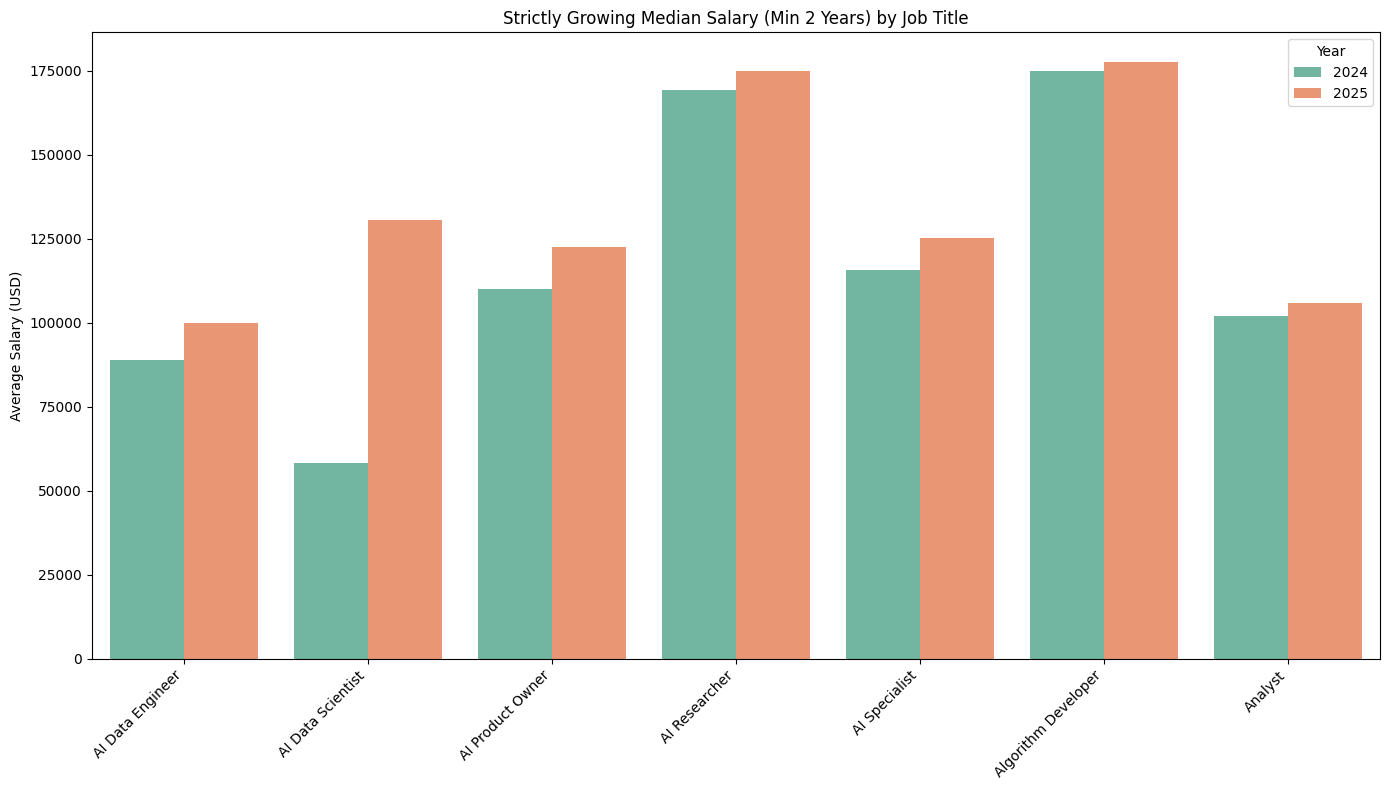

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pivot the DataFrame to wide format (job_title × year)
pivot = grouped_df.pivot(index='job_title', columns='work_year', values='salary_in_usd')

# 2. Function to check: ≥2 years, strictly increasing, ends in 2025
def is_strictly_increasing_to_2025(series):
    non_null = series.dropna()
    if len(non_null) < 2:
        return False
    if not series.get(2025, pd.NA) or pd.isna(series.get(2025)):
        return False
    return non_null.is_monotonic_increasing and non_null.is_unique

# 3. Apply filter to find valid job titles
strictly_growing_titles = pivot[pivot.apply(is_strictly_increasing_to_2025, axis=1)].index

# 4. Filter original DataFrame to only include those job titles
filtered_df = grouped_df[grouped_df['job_title'].isin(strictly_growing_titles)]

# 5. Plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=filtered_df,
    x="job_title",
    y="salary_in_usd",
    hue="work_year",
    palette="Set2"
)

plt.xticks(rotation=45, ha='right')
plt.xlabel("")
plt.ylabel("Average Salary (USD)")
plt.title("Strictly Growing Median Salary (Min 2 Years) by Job Title")
plt.tight_layout()
plt.legend(title="Year")
plt.show()
